In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate

Preparando banco para modelagem

In [171]:
# Importando
banco = pd.read_excel("Dados\default of credit card clients.xls",header=1)

# Mudando o tipo das variáveis que são categóricas
banco.SEX = banco.SEX.astype("category")
banco.EDUCATION = banco.EDUCATION.astype("category")
banco.MARRIAGE = banco.MARRIAGE.astype("category")
banco.PAY_0 = banco.PAY_0.astype("category")
banco.PAY_2 = banco.PAY_2.astype("category")
banco.PAY_3 = banco.PAY_3.astype("category")
banco.PAY_4 = banco.PAY_4.astype("category")
banco.PAY_5 = banco.PAY_5.astype("category")
banco.PAY_6 = banco.PAY_6.astype("category")

# Separando a variável resposta
X=banco.loc[:, 'LIMIT_BAL':'PAY_AMT6']
y=banco["default payment next month"]

Calculando correlação

In [172]:
correlacao = X.corr()
correlacao.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


Removendo covariáveis com alta correlação

In [173]:
## Selecionando o triângulo superior da matriz de correlação
upper = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(bool))

In [174]:
## Encontrando as colunas com correlação maior do que 0.6

to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

print(to_drop)

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [175]:
## Banco sem as variáveis altamente correlacionadas

X = X.drop(X[to_drop], axis=1)

In [176]:
## Problema de correlação continua não resolvido

teste = X.corr()
teste.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
PAY_AMT1,0.195236,0.026147,0.140277,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAY_AMT3,0.210167,0.029247,0.156887,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740
PAY_AMT4,0.203242,0.021379,0.158303,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834
PAY_AMT5,0.217202,0.022850,0.167026,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896
PAY_AMT6,0.219595,0.019478,0.179341,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000


Dividindo banco de treino e verificação

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)



Montando função de prototipagem

In [178]:
def prototipo(modelo,xtreino,ytreino,xteste,yteste):
    modelo.fit(xtreino,ytreino)

    y_test_pred = modelo.predict(xteste)
    #matriz de confusão
    print(confusion_matrix(yteste, y_test_pred))
    #estatísticas gerais do modelo
    print(classification_report(yteste, y_test_pred))
    #curva ROC
    fpr, tpr, _ = roc_curve(yteste, y_test_pred)
    fig, ax = plt.subplots()
    ax.plot(fpr,tpr)
    ax.set(xlabel='False Positive Rate',ylabel='True Positive Rate')
    plt.show()

    cv = cross_validate(modelo,pd.concat([xtreino,xteste]),pd.concat([ytreino,yteste]), cv= 10, scoring = ('recall','precision','accuracy'))
    
    print("\nA acuracia média com dez dobras é de",round(cv['test_accuracy'].mean()*100,2),"%", 'com erro padrão de ', np.std((cv['test_accuracy']*100)).round(2),"%","\n")
    print("\nA precisão média com dez dobras é de",round(cv['test_precision'].mean()*100,2),"%", 'com erro padrão de ', np.std((cv['test_precision']*100)).round(2),"%","\n")
    print("\nA sensibilidade média com dez dobras é de",round(cv['test_recall'].mean()*100,2),"%", 'com erro padrão de ', np.std((cv['test_recall']*100)).round(2),"%","\n")

# Regressão Logística

[[6997    0]
 [2003    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6997
           1       0.00      0.00      0.00      2003

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

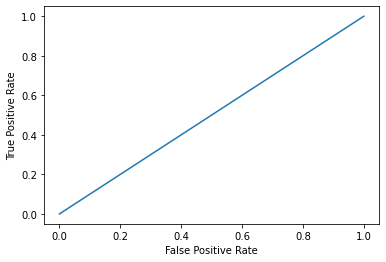

C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\l


A acuracia média com dez dobras é de 77.88 % com erro padrão de  0.02 % 


A precisão média com dez dobras é de 0.0 % com erro padrão de  0.0 % 


A sensibilidade média com dez dobras é de 0.0 % com erro padrão de  0.0 % 



C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
lr = LogisticRegression(max_iter=1000)
prototipo(lr,X_train,y_train,X_test,y_test)

# Regressão Logística com SGD

[[2707 4290]
 [ 844 1159]]
              precision    recall  f1-score   support

           0       0.76      0.39      0.51      6997
           1       0.21      0.58      0.31      2003

    accuracy                           0.43      9000
   macro avg       0.49      0.48      0.41      9000
weighted avg       0.64      0.43      0.47      9000



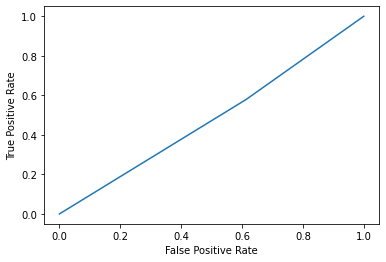

C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\l


A acuracia média com dez dobras é de 68.78 % com erro padrão de  18.7 % 


A precisão média com dez dobras é de 8.92 % com erro padrão de  15.19 % 


A sensibilidade média com dez dobras é de 15.44 % com erro padrão de  32.27 % 



In [180]:
lr_sgd = SGDClassifier(loss='log')

prototipo(lr_sgd,X_train,y_train,X_test,y_test)

# Support Vector Machine RBF

[[6997    0]
 [2003    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6997
           1       0.00      0.00      0.00      2003

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

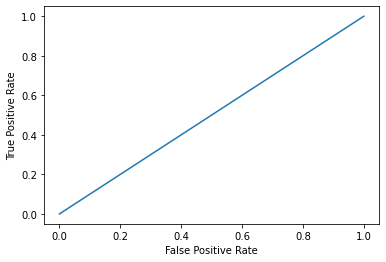

C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



A acuracia média com dez dobras é de 56.45 % com erro padrão de  22.54 % 


A precisão média com dez dobras é de 14.89 % com erro padrão de  9.97 % 


A sensibilidade média com dez dobras é de 37.49 % com erro padrão de  41.56 % 



C:\Users\e-luiz.alvarenga\.conda\envs\luiz_base\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
svc = SGDClassifier()

prototipo(svc,X_train,y_train,X_test,y_test)

# Árvore de Decisão

[[5740 1257]
 [1192  811]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6997
           1       0.39      0.40      0.40      2003

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



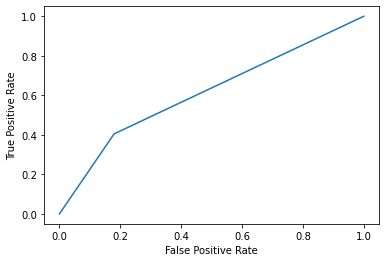


A acuracia média com dez dobras é de 72.1 % com erro padrão de  0.77 % 


A precisão média com dez dobras é de 37.96 % com erro padrão de  1.55 % 


A sensibilidade média com dez dobras é de 41.2 % com erro padrão de  1.95 % 



In [182]:
arvore = tree.DecisionTreeClassifier()

prototipo(arvore,X_train,y_train,X_test,y_test)

# Árvore Aleatória

[[6585  412]
 [1276  727]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6997
           1       0.64      0.36      0.46      2003

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



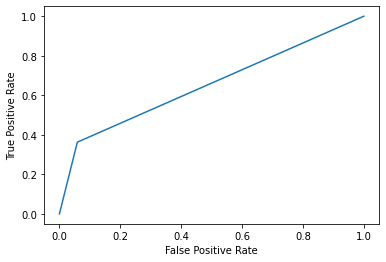


A acuracia média com dez dobras é de 81.82 % com erro padrão de  0.61 % 


A precisão média com dez dobras é de 65.49 % com erro padrão de  2.2 % 


A sensibilidade média com dez dobras é de 37.63 % com erro padrão de  2.29 % 



In [183]:
arvore_aleatoria = RandomForestClassifier()

prototipo(arvore_aleatoria,X_train,y_train,X_test,y_test)

# AdaBoost

[[6698  299]
 [1389  614]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6997
           1       0.67      0.31      0.42      2003

    accuracy                           0.81      9000
   macro avg       0.75      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



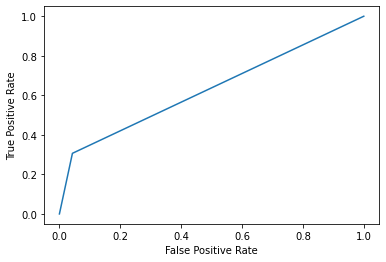


A acuracia média com dez dobras é de 81.71 % com erro padrão de  0.64 % 


A precisão média com dez dobras é de 68.5 % com erro padrão de  2.94 % 


A sensibilidade média com dez dobras é de 32.05 % com erro padrão de  2.02 % 



In [184]:
ada = AdaBoostClassifier()

prototipo(ada,X_train,y_train,X_test,y_test)

# Naive bayes

[[1673 5324]
 [ 224 1779]]
              precision    recall  f1-score   support

           0       0.88      0.24      0.38      6997
           1       0.25      0.89      0.39      2003

    accuracy                           0.38      9000
   macro avg       0.57      0.56      0.38      9000
weighted avg       0.74      0.38      0.38      9000



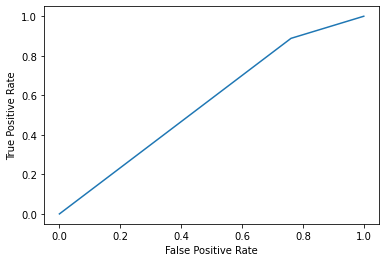


A acuracia média com dez dobras é de 37.71 % com erro padrão de  1.0 % 


A precisão média com dez dobras é de 24.71 % com erro padrão de  0.34 % 


A sensibilidade média com dez dobras é de 88.73 % com erro padrão de  1.39 % 



In [185]:
naive = GaussianNB()

prototipo(naive,X_train,y_train,X_test,y_test)

# Análise discriminante quadrática

[[4869 2128]
 [ 652 1351]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      6997
           1       0.39      0.67      0.49      2003

    accuracy                           0.69      9000
   macro avg       0.64      0.69      0.64      9000
weighted avg       0.77      0.69      0.71      9000



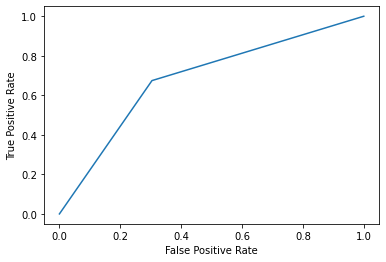


A acuracia média com dez dobras é de 67.58 % com erro padrão de  1.95 % 


A precisão média com dez dobras é de 37.5 % com erro padrão de  1.61 % 


A sensibilidade média com dez dobras é de 69.17 % com erro padrão de  2.73 % 



In [186]:
QDA=QuadraticDiscriminantAnalysis()

prototipo(QDA,X_train,y_train,X_test,y_test)

# Deep Learning

[[5345 1652]
 [1304  699]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      6997
           1       0.30      0.35      0.32      2003

    accuracy                           0.67      9000
   macro avg       0.55      0.56      0.55      9000
weighted avg       0.69      0.67      0.68      9000



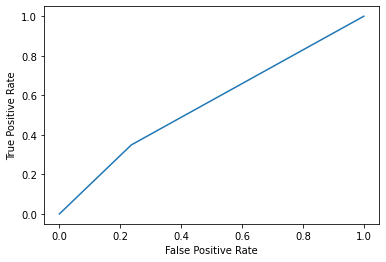


A acuracia média com dez dobras é de 69.45 % com erro padrão de  9.47 % 


A precisão média com dez dobras é de 42.43 % com erro padrão de  12.7 % 


A sensibilidade média com dez dobras é de 37.12 % com erro padrão de  24.14 % 



In [187]:
dl = MLPClassifier()

prototipo(dl,X_train,y_train,X_test,y_test)